Homework 4: Sentiment Analysis - Task 2
----

Names & Sections
----
Names: Harishraj Udaya Bhaskar, Aushee Khamesra (6120) (Write these in every notebook you submit. For each partner, write down whether you are a 4120 or a 6120 student.)

Task 2: Train a Naive Bayes Model (30 points)
----

Using `nltk`'s `NaiveBayesClassifier` class, train a Naive Bayes classifier using a Bag of Words as features.
https://www.nltk.org/_modules/nltk/classify/naivebayes.html 

In [1]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils

# nltk for Naive Bayes and metrics
import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# some potentially helpful data structures from collections
from collections import defaultdict, Counter

# so that we can make plots
import matplotlib.pyplot as plt
# if you want to use seaborn to make plots
#import seaborn as sns

2023-10-28 13:15:25.994800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package punkt to /Users/harisha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "/Users/harisha/Downloads/HW4/movie_reviews_train.txt"
DEV_FILE = "/Users/harisha/Downloads/HW4/movie_reviews_dev.txt"

In [3]:
# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)
train_tups[0][1][1]

'spelled'

In [4]:
# set up a sentiment classifier using NLTK's NaiveBayesClassifier and 
# a bag of words as features
# take a look at the function in lecture notebook 7 (feel free to copy + paste that function)
# the nltk classifier expects a dictionary of features as input where the key is the feature name
# and the value is the feature value

# need to return a dict to work with the NLTK classifier
# Possible problem for students: evaluate the difference 
# between using binarized features and using counts (non binarized features)
def word_feats(words,labels) -> list:
    labeled_data = []
    for i in range(len(words)):
        features = {}
        for word in words[i]:
            features[word] = True
        labeled_tuple = (features, labels[i])
        labeled_data.append(labeled_tuple)
    return labeled_data


# set up & train a sentiment classifier using NLTK's NaiveBayesClassifier and
# classify the first example in the dev set as an example
# make sure your output is well-labeled
# Should take < 10 sec to train (on Felix's computer this takes 0.5 sec)
# Assuming you have already trained the classifier on train_data
train_data=word_feats(train_tups[0],train_tups[1])
test_data=word_feats(dev_tups[0],dev_tups[1])
classifier = nltk.NaiveBayesClassifier.train(train_data)
classifier.show_most_informative_features()

# test to make sure that you can train the classifier and use it to classify a new example
def predict_label(sentence, classifier):
    # Preprocess the sentence (tokenization, lowercase, etc.)
    features = {word: True for word in nltk.word_tokenize(sentence.lower())}

    # Use the trained classifier to predict the label
    label = classifier.classify(features)
    return label

# Example usage:
sentence_to_predict = "I love this product!"
predicted_label = predict_label(sentence_to_predict, classifier)
print(f"Predicted Label: {predicted_label}")


Most Informative Features
                   waste = True                0 : 1      =     21.2 : 1.0
               laughable = True                0 : 1      =     15.2 : 1.0
                pathetic = True                0 : 1      =     14.5 : 1.0
             beautifully = True                1 : 0      =     13.5 : 1.0
                  crappy = True                0 : 1      =     11.8 : 1.0
              amateurish = True                0 : 1      =     11.1 : 1.0
                   lousy = True                0 : 1      =     11.1 : 1.0
                  poorly = True                0 : 1      =     11.1 : 1.0
                  finest = True                1 : 0      =     10.9 : 1.0
                    thin = True                0 : 1      =      9.8 : 1.0
Predicted Label: 0


In [5]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)

# Extracting true labels and predicted labels
true_labels = [label for _, label in test_data]
predicted_labels = [classifier.classify(features) for features, _ in test_data]


# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

# takes approximately 3.5sec to run on Felix's computer


In [6]:
#Generalised BOW function for both binary and multinomial 
def word_feats(words, labels, binary=True) -> list:
    labeled_data = []
    
    for i in range(len(words)):
        if binary:
            # Binary features
            features = {word: True for word in words[i]}
        else:
            # Multinomial features
            word_freq = Counter(words[i])
            total_words = sum(word_freq.values())
            
            # Check for empty documents
            if total_words > 0:
                features = {word: freq / total_words for word, freq in word_freq.items()}
            else:
                features = {}
        
        labeled_tuple = (features, labels[i])
        labeled_data.append(labeled_tuple)
    
    return labeled_data

train_data=word_feats(train_tups[0],train_tups[1])
test_data=word_feats(dev_tups[0],dev_tups[1])
print(test_data)

train_data_multi=word_feats(train_tups[0],train_tups[1],False)
test_data_multi=word_feats(dev_tups[0],dev_tups[1],False)


[({'The': True, 'movie': True, "'Gung": True, 'Ho': True, '!': True, "'": True, ':': True, 'Story': True, 'of': True, 'Carlson': True, "'s": True, 'Makin': True, 'Island': True, 'Raiders': True, 'was': True, 'made': True, 'in': True, '1943': True, 'with': True, 'a': True, 'view': True, 'to': True, 'go': True, 'up': True, 'the': True, 'moral': True, 'American': True, 'people': True, 'at': True, 'duration': True, 'second': True, 'world': True, 'war': True, '.': True, 'It': True, 'shows': True, 'better': True, 'way': True, 'that': True, 'cinema': True, 'can': True, 'constitute': True, 'body': True, 'propaganda': True, 'value': True, 'this': True, 'film': True, 'is': True, 'only': True, 'collection': True, 'and': True, 'no': True, 'artistic': True, 'In': True, 'it': True, 'useless': True, 'judge': True, 'direction': True, 'actors': True, 'Watch': True, 'if': True, 'you': True, 'are': True, 'interested': True, 'learn': True, 'how': True, 'functions': True, 'movies': True, 'or': True, 'big':

In [7]:
#Function to calculate the f1 score for different BOW
def calculate_f1_score(multi_class="binarized"):
    if multi_class == 'binarized':
        classifier1 = nltk.NaiveBayesClassifier.train(train_data)
        predicted_labels = [classifier1.classify(features) for features, _ in test_data]
        actual_labels = [label for features, label in test_data]
        
    if multi_class == 'multinomial':
        classifier1 = nltk.NaiveBayesClassifier.train(train_data_multi)
        predicted_labels = [classifier1.classify(features) for features, label in test_data_multi]
        actual_labels = [label for features, label in test_data_multi]
    
    precision_value = precision_score(true_labels, predicted_labels)
    #Calculating recall value for the selected percentage of dataset
    recall_value = recall_score(true_labels, predicted_labels)
    #Calculating accuracy for the selected percentage of dataset
    accuracy_value = accuracy_score(true_labels, predicted_labels)
    f1_score= 2*(precision_value*recall_value)/(precision_value+recall_value)
    return f1_score

# Example usage
multi_f1=calculate_f1_score('multinomial')
binary_f1=calculate_f1_score()
print(f'The f1 score for multinomial NB: {multi_f1}')
print(f'The f1 score for binary NB: {binary_f1}')


The f1 score for multinomial NB: 0.5365853658536585
The f1 score for binary NB: 0.8061224489795917


Test your model using both a binarized and a multinomial BoW. Use whichever one gives you a better final f1 score on the dev set to produce your graphs.

f1 score binarized: YOUR ANSWER HERETest your model using both a __binarized__ and a __multinomial__ BoW. Use whichever one gives you a better final f1 score on the dev set to produce your graphs.


- f1 score binarized: 0.8061224489795917
- f1 score multinomial: 0.5365853658536585

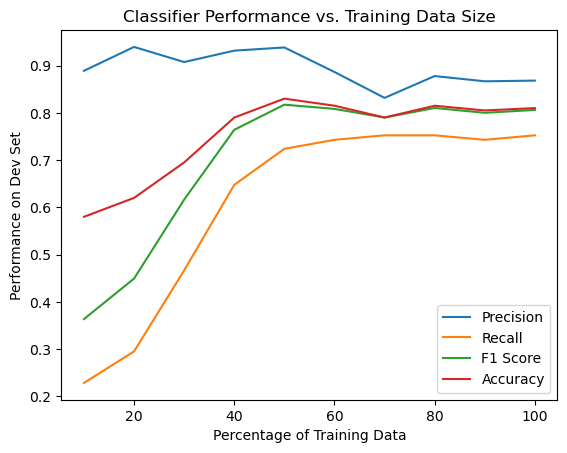

In [8]:
#Plotting the graph for the highest f1 score setting

import matplotlib.pyplot as plt
import numpy as np
from nltk.metrics import ConfusionMatrix
from nltk.metrics.scores import f_measure
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Assuming you have your classifier and dev set prepared

# Define the percentages of training data you want to use
training_percentages = np.linspace(10, 100, 10)  # Adjust as needed

# Initialize empty lists to store performance metrics for each percentage
precision_values = []
recall_values = []
f1_values = []
accuracy_values = []

# Loop through different percentages of training data
for percentage in training_percentages:
    train_size = int(len(train_data) * percentage / 100)
    train_subset = train_data[:train_size]
    
    # Training the classifier on the selected percentage of train dataset
    classifier1 = nltk.NaiveBayesClassifier.train(train_subset)
    #Collecting all the predicted labels for the test dataset
    predicted_labels = [classifier1.classify(features) for features, _ in test_data]
    #Calculating precision score for the selected percentage of dataset
    precision_value = precision_score(true_labels, predicted_labels)
    #Calculating recall value for the selected percentage of dataset
    recall_value = recall_score(true_labels, predicted_labels)
    #Calculating accuracy for the selected percentage of dataset
    accuracy_value = accuracy_score(true_labels, predicted_labels)
    #Calculating f1 Score for the selected percentage of dataset
    f1_score= 2*(precision_value*recall_value)/(precision_value+recall_value)

    #Appending all the values to the list to keep a track of all the values
    precision_values.append(precision_value)
    recall_values.append(recall_value)
    f1_values.append(f1_score)
    accuracy_values.append(accuracy_value)
    

# Plot the results
plt.plot(training_percentages, precision_values, label='Precision')
plt.plot(training_percentages, recall_values, label='Recall')
plt.plot(training_percentages, f1_values, label='F1 Score')
plt.plot(training_percentages, accuracy_values, label='Accuracy')

# Add labels and title
plt.xlabel('Percentage of Training Data')
plt.ylabel('Performance on Dev Set')
plt.title('Classifier Performance vs. Training Data Size')
plt.legend()

# Show the plot

plt.show()
plt.close()
